#3-1

testing different solutions

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [9]:
latent_dim = 64# compression (vs. the input is 784)
# define autoencoder class
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    # model that maps an input to its latent/encoded representation
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'), ])
    # model that maps an encoded representation to reconstructed
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28)) ])
  def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded
# model that maps an input to its reconstruction
autoencoder = Autoencoder(latent_dim)
# configure the model
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0238 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1

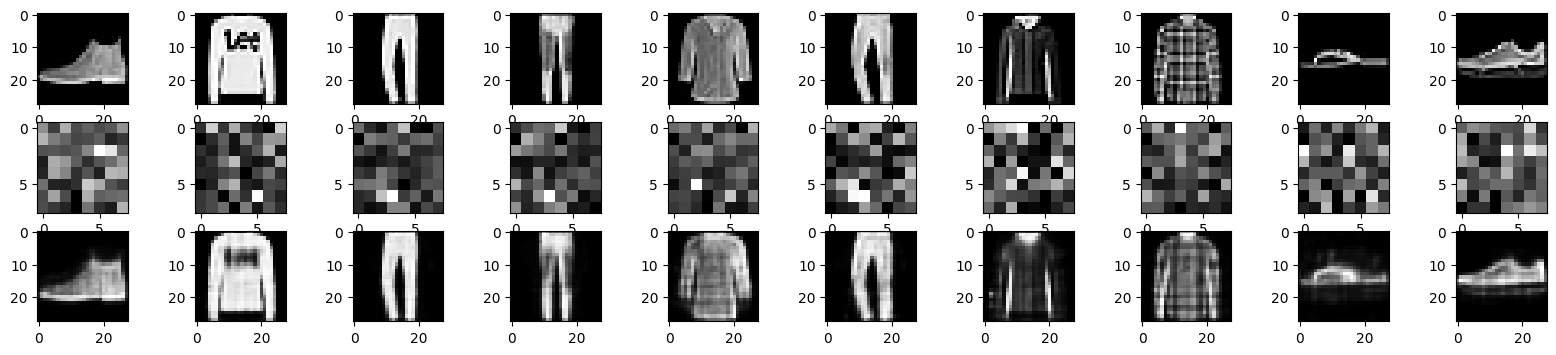

In [10]:
# read dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
# normalize all values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#fit autoencoder
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True,
validation_data=(x_test, x_test))
# encode and decode some digits, taking them from the *test* set
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
# visualise the results
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.gray()
  # display latent code
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(8, 8))
  plt.gray()
  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i])
  plt.gray()
plt.show()

In [5]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
# size of encoded representations
encoding_dim = 32 # compression (vs. the input is 784)
# input placeholder
input_img = Input(shape=(784,))
# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# model that maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# model that maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# configure the model
autoencoder.compile(optimizer='adam', loss='mse')
# read dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
# normalize all values between 0 and 1 and flatten
# the 28x28 images into vectors of size 784.

4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.0616 - val_loss: 0.0329
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0283 - val_loss: 0.0248
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0225 - val_loss: 0.0206
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0190 - val_loss: 0.0178
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0168 - val_loss: 0.0161
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0155 - val_loss: 0.0151
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0148 - val_loss: 0.0146
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0143 - val_loss: 0.0142
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0136 - val_loss: 0.013

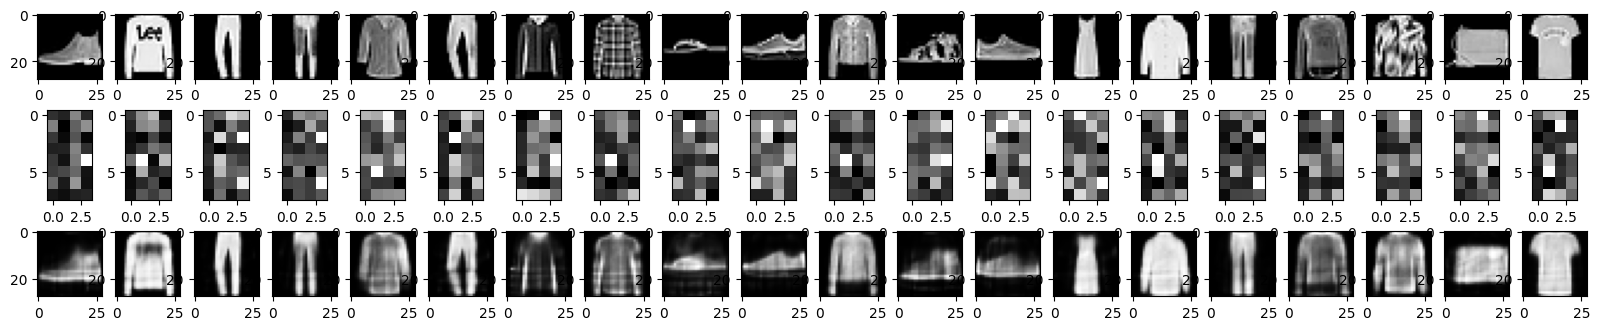

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#fit autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,
shuffle=True, validation_data=(x_test, x_test))
# encode and decode some digits, taking them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# visualise the results
n = 20 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  # display code
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(8, 4))
  plt.gray()
  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
plt.show()

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
#code from
#https://www.tensorflow.org/tutorials/generative/autoencoder
#I modified the architecture
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)


In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0235 - val_loss: 0.0129
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.008

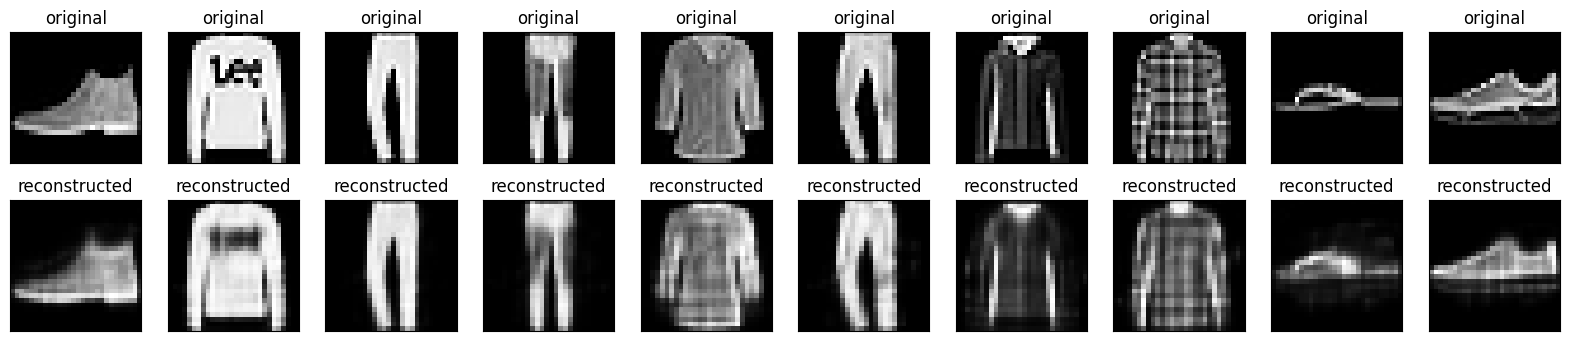

In [16]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()



n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()






In [18]:

import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


In [19]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [20]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))



In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



(60000, 784)
(10000, 784)


In [23]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.4142 - val_loss: 0.3440
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3269 - val_loss: 0.3180
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.3100 - val_loss: 0.3070
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3013 - val_loss: 0.3001
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2954 - val_loss: 0.2953
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2917 - val_loss: 0.2924
Epoch 7/50
235/235 [==============================] - 3s 15ms/step - loss: 0.2894 - val_loss: 0.2907
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2879 - val_loss: 0.2896
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2869 - val_loss: 0.2886
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2862 - val_lo

In [24]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 [==============================] - 1s 2ms/step


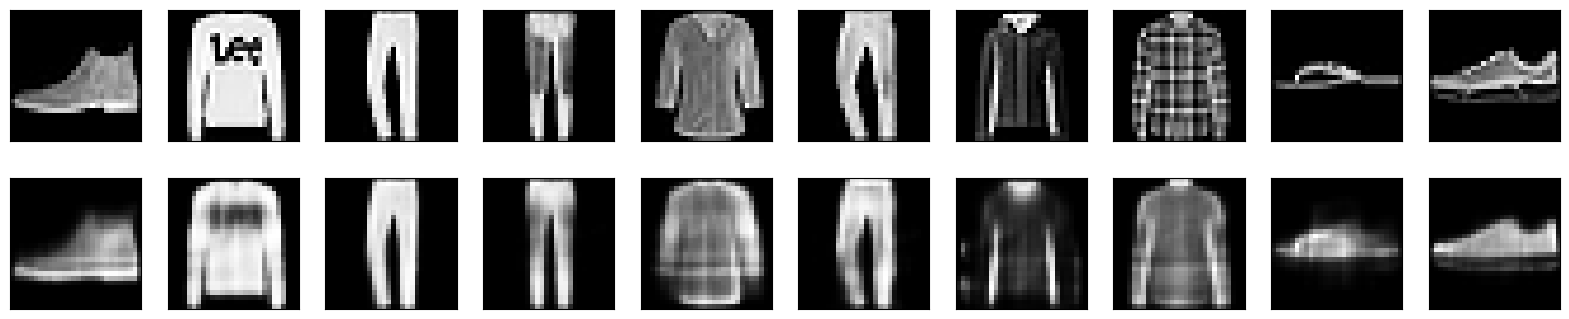

In [25]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [32]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# Define the decoder layers
decoder_input = keras.Input(shape=(32,))
decoded = autoencoder.layers[-3](decoder_input)
decoded = autoencoder.layers[-2](decoded)
decoded = autoencoder.layers[-1](decoded)

# Create the decoder model
decoder = keras.Model(decoder_input, decoded)

# Connect the encoder's output to the decoder's input
autoencoder_output = decoder(encoder(input_img))
autoencoder = keras.Model(input_img, autoencoder_output)

In [35]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 7s 20ms/step - loss: 0.3721 - val_loss: 0.3172
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.3094 - val_loss: 0.3068
Epoch 3/100
235/235 [==============================] - 5s 22ms/step - loss: 0.3015 - val_loss: 0.3004
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2965 - val_loss: 0.2965
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2931 - val_loss: 0.2936
Epoch 6/100
235/235 [==============================] - 5s 22ms/step - loss: 0.2906 - val_loss: 0.2918
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2887 - val_loss: 0.2900
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2871 - val_loss: 0.2884
Epoch 9/100
235/235 [==============================] - 5s 22ms/step - loss: 0.2857 - val_loss: 0.2878
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.284

313/313 [==============================] - 1s 2ms/step


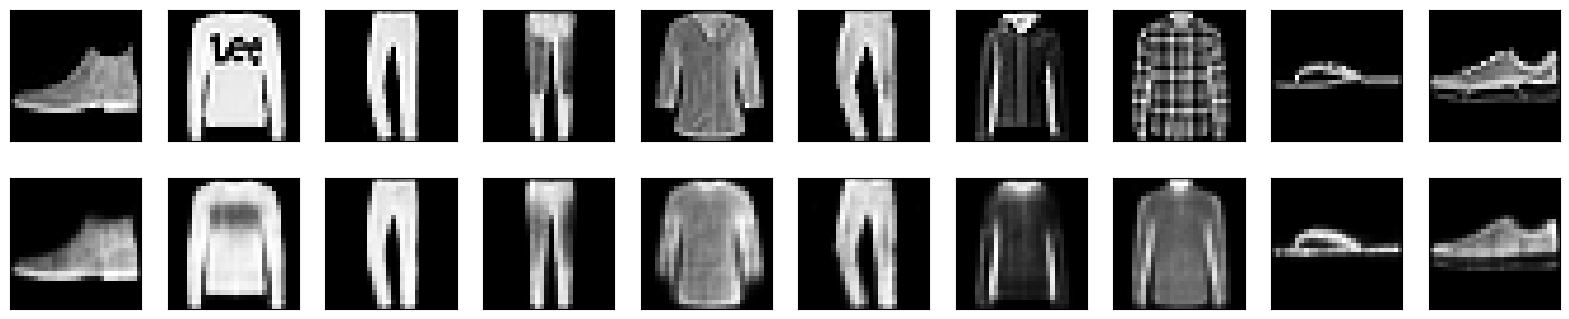

In [36]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#3-2

In [80]:
import keras
from keras import layers
from keras.datasets import mnist
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [55]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [81]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 70s 146ms/step - loss: 0.2189 - accuracy: 0.7984 - val_loss: 0.1394 - val_accuracy: 0.8037
Epoch 2/10
469/469 [==============================] - 65s 139ms/step - loss: 0.1321 - accuracy: 0.8062 - val_loss: 0.1246 - val_accuracy: 0.8066
Epoch 3/10
469/469 [==============================] - 66s 142ms/step - loss: 0.1219 - accuracy: 0.8083 - val_loss: 0.1175 - val_accuracy: 0.8086
Epoch 4/10
469/469 [==============================] - 68s 145ms/step - loss: 0.1164 - accuracy: 0.8093 - val_loss: 0.1131 - val_accuracy: 0.8091
Epoch 5/10
469/469 [==============================] - 65s 138ms/step - loss: 0.1127 - accuracy: 0.8100 - val_loss: 0.1099 - val_accuracy: 0.8090
Epoch 6/10
469/469 [==============================] - 67s 144ms/step - loss: 0.1099 - accuracy: 0.8105 - val_loss: 0.1081 - val_accuracy: 0.8103
Epoch 7/10
469/469 [==============================] - 68s 145ms/step - loss: 0.1078 - accuracy: 0.8109 - val_loss: 0.1058 - val_ac

313/313 [==============================] - 4s 13ms/step


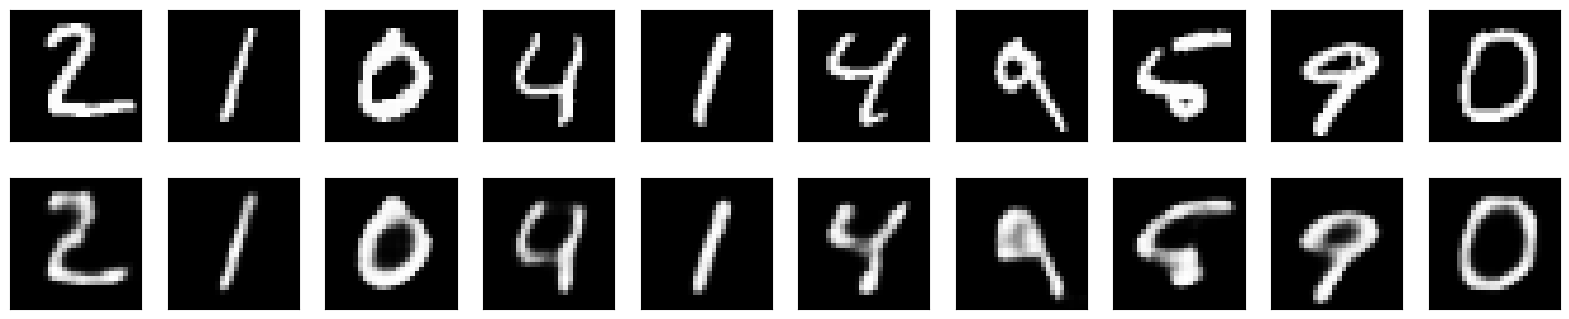

313/313 [==============================] - 4s 12ms/step - loss: 0.1048
Mean Squared Error: 0.10475164651870728


In [57]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# After training
mse = autoencoder.evaluate(x_test, x_test)
print("Mean Squared Error:", mse)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# Import MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
# convert output if use ’categorical_crossentropy’, or do not, if
# ’sparse_categorical_crossentropy’
#Y_train = utils.to_categorical(y_train, number_of_classes)
#Y_test = utils.to_categorical(y_test, number_of_classes)
number_of_classes = 10
# Three steps to create a CNN
# 1. Convolution
# 2. Activation
# 3. Pooling

In [43]:
# Repeat Steps 1,2,3 for adding more hidden layers
# 4. After that make a fully connected network
# This fully connected network gives ability to
# the CNN to classify the samples
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(number_of_classes))
model.add(Activation('softmax'))

In [44]:
#model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy’])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(), metrics=['accuracy'])
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)
model.fit(train_generator, batch_size=64, epochs=5, validation_data=test_generator)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 190s 200ms/step - loss: 0.1206 - accuracy: 0.9621 - val_loss: 0.0533 - val_accuracy: 0.9828
Epoch 2/5
938/938 [==============================] - 191s 204ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.1015 - val_accuracy: 0.9706
Epoch 3/5
938/938 [==============================] - 191s 203ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0395 - val_accuracy: 0.9869
Epoch 4/5
938/938 [==============================] - 197s 210ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0922 - val_accuracy: 0.9707
Epoch 5/5
938/938 [==============================] - 186s 199ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0579 - val_accuracy: 0.9795


In [46]:
print("Shape of X_test:", X_test.shape)
decoded_imgs = model.predict(X_test)
print("Shape of decoded_imgs:", decoded_imgs.shape)

Shape of X_test: (10000, 28, 28, 1)
313/313 [==============================] - 8s 25ms/step
Shape of decoded_imgs: (10000, 10)


In [47]:
decoded_imgs = model.predict(X_test)


313/313 [==============================] - 8s 26ms/step


1/1 [==============================] - 0s 42ms/step


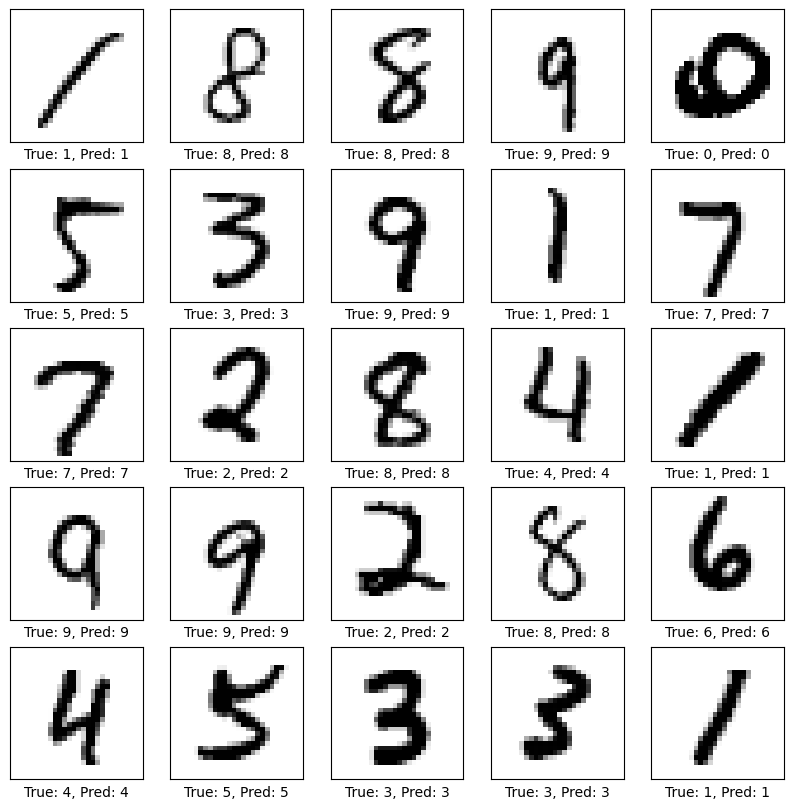

In [48]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to plot images with their predicted labels
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if predictions is not None:
            plt.xlabel(f"True: {labels[i]}, Pred: {np.argmax(predictions[i])}")
        else:
            plt.xlabel(f"True: {labels[i]}")
    plt.show()

# Select random samples from test set
sample_indices = np.random.choice(len(X_test), 25, replace=False)
sample_images = X_test[sample_indices]
sample_labels = Y_test[sample_indices]

# Predict using the trained model
predictions = model.predict(sample_images)

# Plot the images with their predictions
plot_images(sample_images.squeeze(), sample_labels, predictions)

In [53]:
# After training
mse = autoencoder.evaluate(x_test, x_test)
print("Mean Squared Error:", mse)

313/313 [==============================] - 4s 12ms/step - loss: 0.1004
Mean Squared Error: 0.10035774856805801


1/1 [==============================] - 0s 25ms/step


ValueError: cannot reshape array of size 10 into shape (28,28)

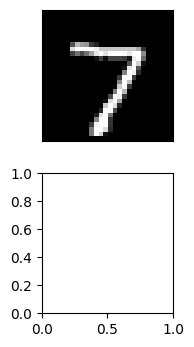

In [52]:
#can get to work with lecture slide code

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    decoded_img = model.predict(X_test[i].reshape(1, 28, 28, 1))  # Assuming your model can reconstruct images
    plt.imshow(decoded_img.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#3-3

In [58]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [59]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 4s 0us/step


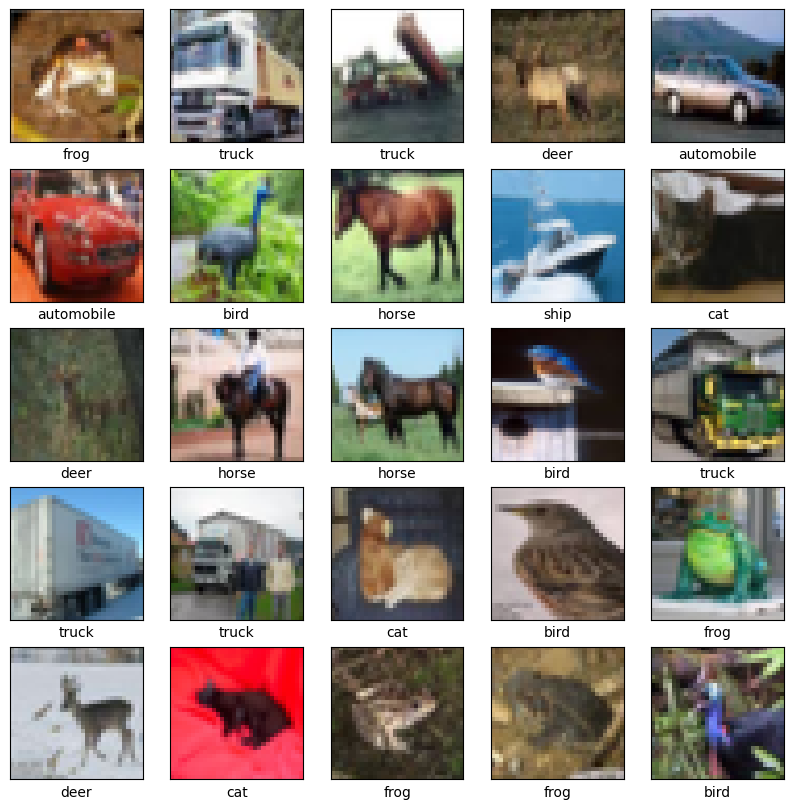

In [60]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [73]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5063 - accuracy: 0.4503 - val_loss: 1.2437 - val_accuracy: 0.5451
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1374 - accuracy: 0.5958 - val_loss: 1.0695 - val_accuracy: 0.6227
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9838 - accuracy: 0.6551 - val_loss: 0.9935 - val_accuracy: 0.6542
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8838 - accuracy: 0.6882 - val_loss: 0.8896 - val_accuracy: 0.6875
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8170 - accuracy: 0.7147 - val_loss: 0.8922 - val_accuracy: 0.6906
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7543 - accuracy: 0.7366 - val_loss: 0.8438 - val_accuracy: 0.7058
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7103 - accuracy: 0.7517 - val_loss: 0.9350 -

313/313 - 3s - loss: 0.8549 - accuracy: 0.7136 - 3s/epoch - 11ms/step


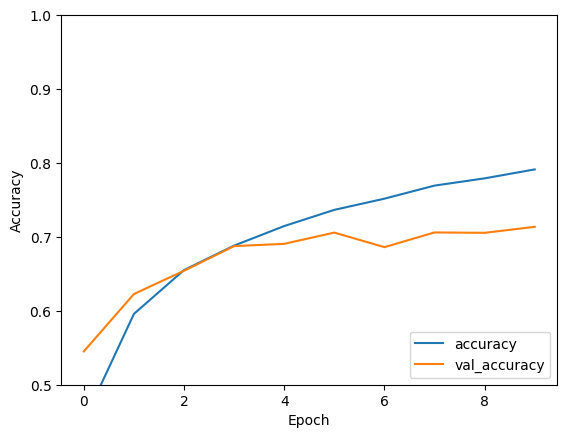

In [63]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [64]:
print(test_acc)


0.7135999798774719


model 2

In [67]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 124s 78ms/step - loss: 1.5690 - accuracy: 0.4073 - val_loss: 1.2615 - val_accuracy: 0.5423
Epoch 2/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.1538 - accuracy: 0.5863 - val_loss: 1.1026 - val_accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.9731 - accuracy: 0.6561 - val_loss: 0.9895 - val_accuracy: 0.6535
Epoch 4/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.8444 - accuracy: 0.7021 - val_loss: 0.9403 - val_accuracy: 0.6735
Epoch 5/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.7422 - accuracy: 0.7396 - val_loss: 0.8841 - val_accuracy: 0.6948
Epoch 6/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.6545 - accuracy: 0.7712 - val_loss: 0.9046 - val_accuracy: 0.6994
Epoch 7/10
1563/1563 [==============================] - 121s 78ms/step - loss: 0.5794 - accuracy: 0.7973 - val_loss: 0

313/313 - 4s - loss: 1.0220 - accuracy: 0.7039 - 4s/epoch - 13ms/step


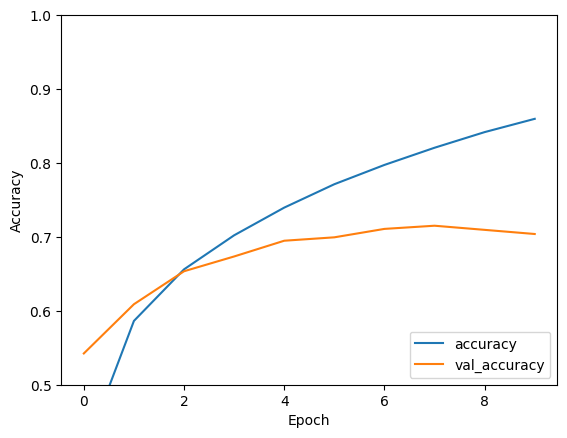

In [69]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model 3

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='gelu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='gelu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(10))

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 95s 60ms/step - loss: 2.0098 - accuracy: 0.3070 - val_loss: 1.8727 - val_accuracy: 0.3406
Epoch 2/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6544 - accuracy: 0.4262 - val_loss: 1.5412 - val_accuracy: 0.4620
Epoch 3/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.4278 - accuracy: 0.4927 - val_loss: 1.4216 - val_accuracy: 0.4878
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.2794 - accuracy: 0.5391 - val_loss: 1.2819 - val_accuracy: 0.5385
Epoch 5/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1698 - accuracy: 0.5870 - val_loss: 1.1840 - val_accuracy: 0.5841
Epoch 6/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.0615 - accuracy: 0.6382 - val_loss: 1.1217 - val_accuracy: 0.6253
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9573 - accuracy: 0.6845 - val_loss: 1.0668 

313/313 - 5s - loss: 1.0165 - accuracy: 0.6796 - 5s/epoch - 15ms/step


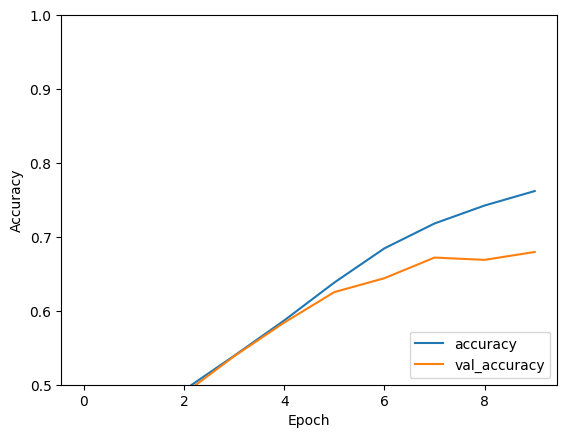

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model 4

In [74]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [75]:
model.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 2.2253 - accuracy: 0.1595 - val_loss: 2.1022 - val_accuracy: 0.2201
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.0363 - accuracy: 0.2573 - val_loss: 1.9853 - val_accuracy: 0.2834
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.9590 - accuracy: 0.2942 - val_loss: 1.9221 - val_accuracy: 0.3203
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.8961 - accuracy: 0.3184 - val_loss: 1.8603 - val_accuracy: 0.3335
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.8258 - accuracy: 0.3502 - val_loss: 1.7895 - val_accuracy: 0.3638
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.7638 - accuracy: 0.3730 - val_loss: 1.7415 - val_accuracy: 0.3777
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.7180 - accuracy: 0.3866 - val_loss: 1.6998 -

313/313 - 4s - loss: 1.6228 - accuracy: 0.4182 - 4s/epoch - 14ms/step


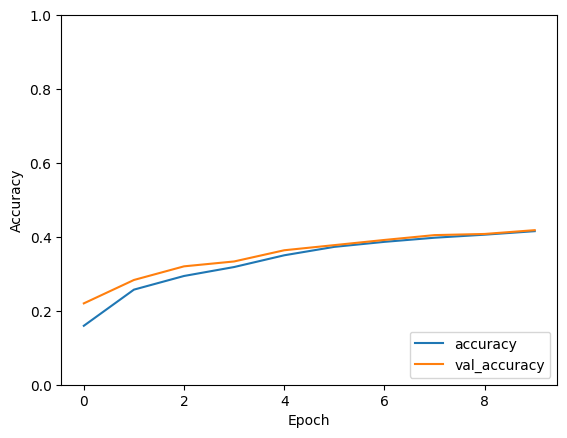

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model 5

In [82]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [83]:
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 79s 48ms/step - loss: 1.4572 - accuracy: 0.4708 - val_loss: 1.1991 - val_accuracy: 0.5724
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1104 - accuracy: 0.6091 - val_loss: 1.0391 - val_accuracy: 0.6318
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9669 - accuracy: 0.6617 - val_loss: 0.9796 - val_accuracy: 0.6533
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8725 - accuracy: 0.6948 - val_loss: 1.0344 - val_accuracy: 0.6414
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8034 - accuracy: 0.7195 - val_loss: 0.8616 - val_accuracy: 0.6997
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7490 - accuracy: 0.7377 - val_loss: 0.8501 - val_accuracy: 0.7061
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6981 - accuracy: 0.7549 - val_loss: 0.8498 -

313/313 - 3s - loss: 0.8392 - accuracy: 0.7182 - 3s/epoch - 11ms/step


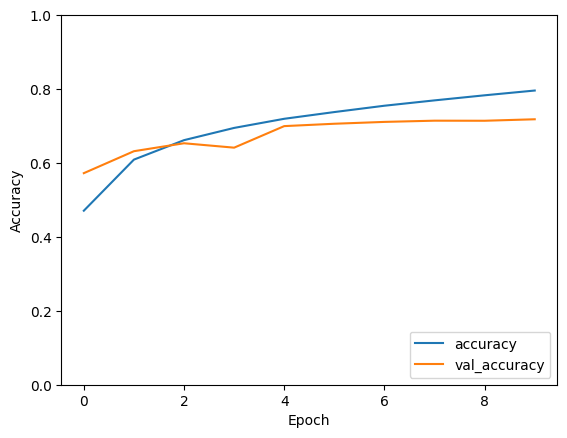

In [84]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model 6

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [85]:
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 77s 48ms/step - loss: 0.5525 - accuracy: 0.8050 - val_loss: 0.8608 - val_accuracy: 0.7172
Epoch 2/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5235 - accuracy: 0.8147 - val_loss: 0.8867 - val_accuracy: 0.7129
Epoch 3/15
1563/1563 [==============================] - 71s 46ms/step - loss: 0.4937 - accuracy: 0.8254 - val_loss: 0.8889 - val_accuracy: 0.7203
Epoch 4/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4665 - accuracy: 0.8333 - val_loss: 0.9288 - val_accuracy: 0.7144
Epoch 5/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4414 - accuracy: 0.8420 - val_loss: 0.9396 - val_accuracy: 0.7205
Epoch 6/15
1563/1563 [==============================] - 71s 46ms/step - loss: 0.4165 - accuracy: 0.8504 - val_loss: 0.9826 - val_accuracy: 0.7103
Epoch 7/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3899 - accuracy: 0.8608 - val_loss: 1.0473 -

313/313 - 4s - loss: 1.4205 - accuracy: 0.7010 - 4s/epoch - 13ms/step


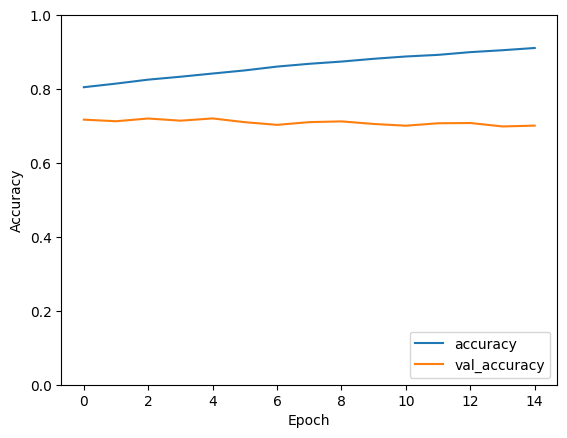

In [86]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)